# NLP

## Лемматизации текста

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def get_pos_tags(tag):
  if tag.startswith('J'):
      wordnet_tag = wordnet.ADJ
      simplified_tag = 'A' #прилагательные
  elif tag.startswith('V'):
      wordnet_tag = wordnet.VERB
      simplified_tag = 'V' #глаголы
  elif tag.startswith('N'):
      wordnet_tag = wordnet.NOUN
      simplified_tag = 'S' #существительные
  elif tag.startswith('R'):
      wordnet_tag = wordnet.ADV
      simplified_tag = 'ADV'
  elif tag in {'IN', 'TO'}:
      wordnet_tag = wordnet.NOUN
      simplified_tag = 'PR'
  elif tag in {'CC'}:
      wordnet_tag = wordnet.NOUN
      simplified_tag = 'CONJ' #союзы
  else:
      wordnet_tag = wordnet.NOUN
      simplified_tag = 'ADV' #сборная категория

  return wordnet_tag, simplified_tag

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()

  sentences = nltk.sent_tokenize(text)
  lemmatized_sentences = []

  for sentence in sentences:
    sentence=re.sub(r'[^\w\s]','',sentence)
    tokens = word_tokenize(sentence)
    # print(tokens)
    pos_tags = pos_tag(tokens)
    # print("pos_tags", pos_tags)

    lemmatized_tokens = []

    for word, pos in pos_tags:
      wordnet_tag, simplified_tag = get_pos_tags(pos)
      lemma = lemmatizer.lemmatize(word.lower(), wordnet_tag)
      lemmatized_tokens.append(f"{word}{{{lemma}={simplified_tag}}}")

    lemmatized_sentence = " ".join(lemmatized_tokens)
    lemmatized_sentences.append(lemmatized_sentence)

  return "\n".join(lemmatized_sentences)

input_text = """Endeavor bachelor but add eat pleasure doubtful sociable.
Age forming covered you entered the examine.
Blessing scarcely confined her contempt wondered shy. """

lemmatized_output = lemmatize_text(input_text)
print(lemmatized_output)

Endeavor{endeavor=S} bachelor{bachelor=S} but{but=CONJ} add{add=V} eat{eat=A} pleasure{pleasure=S} doubtful{doubtful=S} sociable{sociable=A}
Age{age=S} forming{forming=S} covered{cover=V} you{you=ADV} entered{enter=V} the{the=ADV} examine{examine=S}
Blessing{bless=V} scarcely{scarcely=ADV} confined{confine=V} her{her=ADV} contempt{contempt=S} wondered{wonder=V} shy{shy=A}


## Разработка и тестирование метода автоматического реферирования.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def split_into_sentences(text):
  text = re.sub(r'\[\d+(\]\[\d+)*\]', '', text)
  sentences = nltk.sent_tokenize(text)
  return [re.sub(r'[^\w\s]|[\x00-\x1F\x7F-\x9F]', '', sentence) for sentence in sentences]

def read_text_file(file_path):
  with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
  return text

In [ ]:
def extract_key_sentences(text, num_sentences=3):
  sentences = split_into_sentences(text)

  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(sentences)

  sentence_scores = tfidf_matrix.sum(axis=1).flatten().tolist()[0]

  ranked_sentences = sorted(((score, sentence) for score, sentence in zip(sentence_scores, sentences)), reverse=True)

  unique_sentences = set()
  result = []

  for _, sentence in ranked_sentences:
    if sentence not in unique_sentences:
        unique_sentences.add(sentence)
        result.append(sentence)
        if len(result) == num_sentences:
            break

  return result

text_1 = read_text_file('article1.txt')
text_2 = read_text_file('article2.txt')
text_3 = read_text_file('article3.txt')

key_sentences_1 = extract_key_sentences(text_1, num_sentences=3)
key_sentences_2 = extract_key_sentences(text_2, num_sentences=3)
key_sentences_3 = extract_key_sentences(text_3, num_sentences=3)

print("Extracted sentences from document 1:")
print("\n".join(key_sentences_1), '\n')

print("Extracted sentences from document 2:")
print("\n".join(key_sentences_2), '\n')

print("Extracted sentences from document 3:")
print("\n".join(key_sentences_3), '\n')

Extracted sentences from document 1:
Amongst these characteristics of music melody is considered to be the most creative specific and expressive element that characterizesmusic
When two music share the unique parts ofmelody which is rarely uses in others plagiarism can be suspected
With growing useof the World Wide Web the revenue loss due toplagiarism and pirate copies has been escalatingexponentially 

Extracted sentences from document 2:
In this paper we address the development of a system that detects plagiarism based on the similar melody searching which is an operation that finds the melodies similar to a given query melody from a music database
Introduction Recently the use of various types of multimedia data such as images videos and audios has shown its explosive growth so the contentbased search became of great importance
Unlike such previous systems as  our plagiarism detection system has its unique characteristics as follows  A novel similarity model it solves the problem o

In [ ]:
combined_text = text_1 + " " + text_2 + " " + text_3
overall_key_sentences = extract_key_sentences(combined_text, num_sentences=6)
print("Extracted 6 sentences from all combined documents:")
print("\n".join(overall_key_sentences))

Extracted 6 sentences from all combined documents:
By using mfcc entropy and mean energy level we have created a robust fingerprinting algorithm which enables us to differentiate copies from original musicthese three features have been chosen because of two major considerationsThe first being that an algorithm that is extremely efficient meaning that it pin points plagiarism easily and without error
In this paper we address the development of a system that detects plagiarism based on the similar melody searching which is an operation that finds the melodies similar to a given query melody from a music database
Introduction Recently the use of various types of multimedia data such as images videos and audios has shown its explosive growth so the contentbased search became of great importance
Unlike such previous systems as  our plagiarism detection system has its unique characteristics as follows  A novel similarity model it solves the problem of misjudgment by supporting alignment as w

In [ ]:
pip install sumy

In [ ]:
import re
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer

def summarize_text(text, summarizer_class, num_sentences=3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = summarizer_class()
    summary = summarizer(parser.document, num_sentences)
    return [str(sentence) for sentence in summary]

def clean_text(text):
    cleaned_text = re.sub(r'\[\d+(,\s?\d+)*\]', '', text)
    cleaned_text = re.sub(r'[^\w\s\.\?\!]', '', cleaned_text)
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)
    cleaned_text = cleaned_text.replace('\n', ' ')
    return cleaned_text

def get_unique_summary(text, summarizer_class, num_sentences=6):
    summary = summarize_text(text, summarizer_class, num_sentences)
    unique_sentences = set(summary)

    while len(unique_sentences) < num_sentences:
        additional_needed = num_sentences - len(unique_sentences)
        original_sentences = text.split('.')
        for sentence in original_sentences:
            if additional_needed <= 0:
                break
            cleaned_sentence = sentence.strip()
            if cleaned_sentence and cleaned_sentence not in unique_sentences:
                unique_sentences.add(cleaned_sentence)
                additional_needed -= 1

    return list(unique_sentences)[:num_sentences]

text_for_sum = clean_text(combined_text)

luhn_summary = get_unique_summary(text_for_sum, LuhnSummarizer, num_sentences=6)
lsa_summary = get_unique_summary(text_for_sum, LsaSummarizer, num_sentences=6)
textrank_summary = get_unique_summary(text_for_sum, TextRankSummarizer, num_sentences=6)

print("Luhn Summary:")
print("\n".join(luhn_summary), '\n')

print("LSA Summary:")
print("\n".join(lsa_summary), '\n')

print("TextRank Summary:")
print("\n".join(textrank_summary), '\n')

Luhn Summary:
Abstract Music plagiarism detector is an alternative approach for music genre classification which converts  the audio signal into spectrograms and then extracts features from this visual representation.
Furthermore for applications such as radio  monitoring search times on the order of a few milliseconds per query are attained even on a massive music  database.
Unlike such previous systems as  our plagiarism detection system has  its unique characteristics as follows   A novel similarity model it solves the problem of misjudgment by supporting  alignment as well as shifting in the similarity model.
Furthermore for applications such as radio  monitoring search times on the order of a few milliseconds per query are attained even on a massive music  database
In this paper we address the development of a system that detects plagiarism  based on the similar melody searching which is an operation that finds the melodies  similar to a given query melody from a music database.
I

## Разработка и тестирование определения тональности текста.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

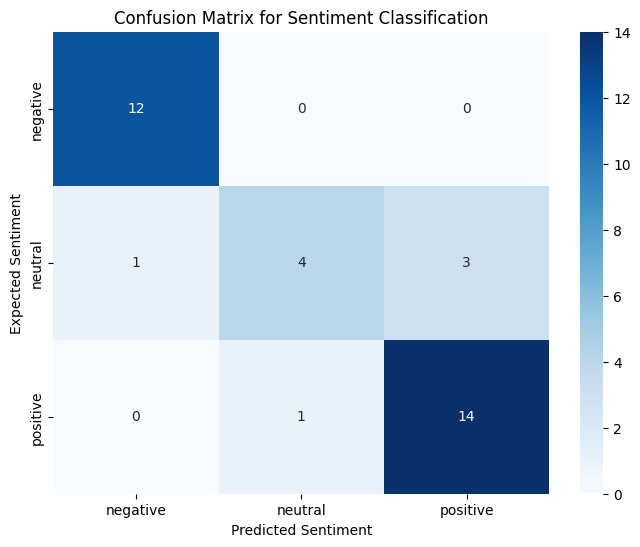

Classification Accuracy: 0.86

Misclassified Sentences:
                           text sentiment predicted_sentiment
11    It could have been better   neutral            positive
12  Just average, nothing great   neutral            negative
19     Satisfactory performance   neutral            positive
30            Could be improved   neutral            positive
34               It made my day  positive             neutral


In [ ]:
sia = SentimentIntensityAnalyzer()

sentiment_weights = {
    'love': 1.0,
    'fantastic': 1.0,
    'best': 1.0,
    'happy': 1.0,
    'hate': -1.0,
    'worst': -1.0,
    'terrible': -1.0,
    'okay': 0.0,
    'special': 0.0,
    'not sure': 1.0,
    'never buy': -1.0,
    'average': 0,
    'could have been': 0,
    'average': 0,
}

def analyze_sentiment(sentence, weights):
  sentiment_score = sia.polarity_scores(sentence)['compound']

  custom_score = 0.0
  for word in sentence.split():
      word = word.lower()
      if word in weights:
          if weights[word] != 0:
              custom_score += weights[word]
          else:
              sentiment_score = 0

  combined_score = sentiment_score + custom_score

  if combined_score > 0.05:
      return 'positive'
  elif combined_score < -0.05:
      return 'negative'
  else:
      return 'neutral'

data = {
    'text': [
        'I love this product',
        'This is the worst thing ever',
        'Absolutely fantastic!',
        'Terrible experience',
        'It was okay',
        'Best purchase I made',
        'I hate it',
        'Nothing special',
        'I am very happy with it',
        'This is amazing!',
        'Extremely disappointed',
        'It could have been better',
        'Just average, nothing great',
        'Loved every moment of using it',
        'Awful, would not recommend',
        'Superb quality!',
        'Disastrous',
        'Not worth the money',
        'Completely satisfied',
        'Satisfactory performance',
        'Quite enjoyable',
        'Really bad experience',
        'Fairly decent',
        'Ruined my entire day',
        'The packaging was good',
        'I’m pleased with my purchase',
        'It was a decent buy',
        'Fantastic! Exceeded my hopes',
        'Absolutely useless',
        'Impressed with the results',
        'Could be improved',
        'Pathetic service',
        'Thrilled with it',
        'Boring',
        'It made my day',
    ],
    'sentiment': [
        'positive',
        'negative',
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative',
        'neutral',
        'positive',
        'positive',
        'negative',
        'neutral',
        'neutral',
        'positive',
        'negative',
        'positive',
        'negative',
        'negative',
        'positive',
        'neutral',
        'positive',
        'negative',
        'neutral',
        'negative',
        'positive',
        'positive',
        'neutral',
        'positive',
        'negative',
        'positive',
        'neutral',
        'negative',
        'positive',
        'negative',
        'positive',
    ]
}

df = pd.DataFrame(data)

df['predicted_sentiment'] = df['text'].apply(lambda x: analyze_sentiment(x, sentiment_weights))

conf_matrix = confusion_matrix(df['sentiment'], df['predicted_sentiment'], labels=['negative', 'neutral', 'positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Expected Sentiment')
plt.title('Confusion Matrix for Sentiment Classification')
plt.show()

accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])
print(f"Classification Accuracy: {accuracy:.2f}")

misclassified = df[df['sentiment'] != df['predicted_sentiment']]
print("\nMisclassified Sentences:")
print(misclassified[['text', 'sentiment', 'predicted_sentiment']])


## Разработка и тестирование методов выделения упоминаний о чем либо в тексте.


In [ ]:
import pandas as pd
import string
from collections import Counter
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = {'oh', 'ooh', 'ah', 'na', 'yeah', 'uh', 'la', 'na', 'woo', 'mmm', 'hey', 'hoo', 'doo'}
stop_words.update(extra_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_and_tokenize(text):
  text = re.sub(r'[^\w\s]', ' ', text).lower()
  tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
  return tokens

df_songs = pd.read_csv('songs.csv')

genre_word_counts = {}

for genre in df_songs['Genre'].unique():
  genre_lyrics = df_songs[df_songs['Genre'] == genre]['Lyrics'].apply(clean_and_tokenize).sum()
  word_count = Counter(genre_lyrics)

  genre_word_counts[genre] = word_count

for genre, word_count in genre_word_counts.items():
  print(f"\nTop 10 words in {genre}:")
  for word, count in word_count.most_common(10):
      print(f"{word}: {count}")

categories = {
  'time_of_day': ['morning', 'afternoon', 'evening', 'night', 'dawn', 'sunset', 'sunrise'],
  'seasons': ['spring', 'summer', 'autumn', 'fall', 'winter'],
  'body_parts': ['hand', 'head', 'heart', 'eye', 'face', 'foot', 'leg', 'arm', 'back']
}

category_results = {genre: {} for genre in df_songs['Genre'].unique()}

for genre in df_songs['Genre'].unique():
  word_count = genre_word_counts[genre]

  for category, words in categories.items():
      category_results[genre][category] = {word: word_count[word] for word in words if word in word_count}

for genre, categories in category_results.items():
    print(f"\nCategory-wise words in {genre}:")
    for category, words in categories.items():
        sorted_words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
        print(f"{category}: {sorted_words}")

common_words = set(genre_word_counts[list(genre_word_counts.keys())[0]].keys())

for genre in genre_word_counts:
  common_words &= {word for word, count in genre_word_counts[genre].items() if count <= 3}

common_words_list = list(common_words)
print(f"\nWords appearing in all genres no more than 3 times:")
print(common_words_list)


Top 10 words in Pop:
shake: 72
like: 43
gonna: 37
happy: 34
cause: 31
know: 26
along: 26
feel: 24
clap: 24
baby: 21

Top 10 words in Rock:
let: 37
sun: 25
go: 19
come: 17
eye: 14
word: 13
without: 13
one: 12
night: 12
say: 10

Top 10 words in Jazz:
know: 25
dream: 17
day: 15
love: 14
new: 13
night: 11
sky: 10
feel: 10
see: 9
word: 9

Top 10 words in Hip-Hop:
go: 44
like: 44
glory: 42
right: 35
come: 34
back: 33
know: 30
new: 30
wish: 28
get: 26

Category-wise words in Pop:
time_of_day: {'night': 2}
seasons: {'fall': 3, 'summer': 1}
body_parts: {'eye': 9, 'heart': 7, 'back': 4, 'face': 3, 'arm': 3, 'foot': 2, 'hand': 1, 'head': 1}

Category-wise words in Rock:
time_of_day: {'night': 12, 'morning': 1}
seasons: {'summer': 1, 'winter': 1}
body_parts: {'eye': 14, 'face': 6, 'back': 6, 'hand': 2, 'head': 2, 'heart': 1, 'foot': 1}

Category-wise words in Jazz:
time_of_day: {'night': 11, 'dawn': 6, 'morning': 3}
seasons: {'autumn': 3, 'spring': 2, 'fall': 2, 'winter': 2, 'summer': 1}
body_par